In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

In [2]:
customers_url = 'https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE'
transactions_url = 'https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF'

customers = pd.read_csv(customers_url)
transactions = pd.read_csv(transactions_url)

In [3]:
# Task 3: Customer Segmentation
def perform_clustering():
    # Aggregating customer data
    customer_data = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
    customer_data = customer_data.merge(customers, on='CustomerID')

    # Ensuring necessary columns exist
    if 'Region' in customer_data.columns:
        customer_data['RegionEncoded'] = customer_data['Region'].astype('category').cat.codes
    else:
        print("Error: 'Region' column missing in customer_data")
        return

    # Standardizing data
    features = ['TotalValue', 'Quantity', 'RegionEncoded']
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(customer_data[features])

    # Elbow method for optimal clusters
    distortions = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(standardized_data)
        distortions.append(sum(np.min(cdist(standardized_data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / standardized_data.shape[0])

    plt.plot(range(2, 11), distortions, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

    # KMeans clustering
    optimal_clusters = 4
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    customer_data['Cluster'] = kmeans.fit_predict(standardized_data)

    # Evaluate clustering with DB Index
    db_index = davies_bouldin_score(standardized_data, customer_data['Cluster'])
    print(f"Davies-Bouldin Index: {db_index}")

    # Visualize clusters
    sns.scatterplot(
        x=standardized_data[:, 0],
        y=standardized_data[:, 1],
        hue=customer_data['Cluster'],
        palette='viridis'
    )
    plt.title("Customer Clusters")
    plt.show()

    return standardized_data

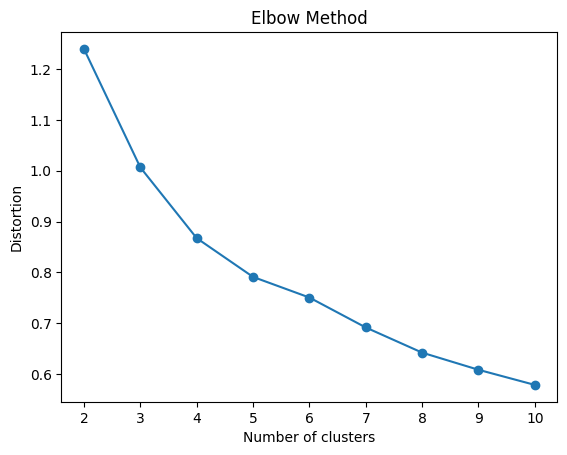

Davies-Bouldin Index: 0.932037310279212


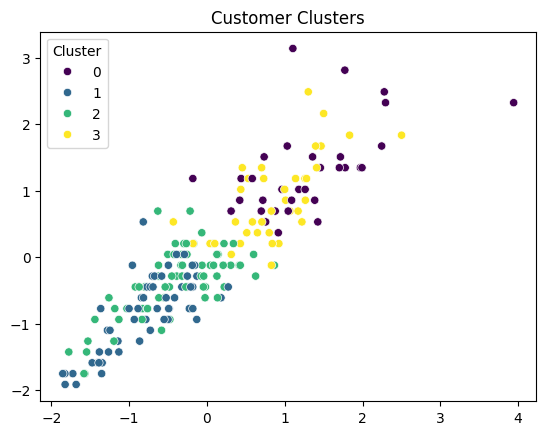

array([[-0.06170143, -0.12203296,  1.23740234],
       [-0.87774353, -0.44800021, -1.41989693],
       [-0.40585722,  0.20393428,  1.23740234],
       [ 1.03254704,  1.67078689,  1.23740234],
       [-0.78392861, -0.93695108, -1.41989693],
       [ 0.41587942, -0.12203296,  1.23740234],
       [-0.48548229, -0.77396745, -1.41989693],
       [ 0.43997044,  1.18183602,  0.35163592],
       [-1.40630171, -1.58888557, -0.53413051],
       [-0.9571662 , -0.12203296, -0.53413051],
       [ 0.14369581,  0.04095066,  1.23740234],
       [ 0.96492372,  1.0188524 ,  1.23740234],
       [ 1.38575064,  0.85586877,  1.23740234],
       [-1.72239508, -1.75186919, -0.53413051],
       [-1.26353893, -1.42590195,  0.35163592],
       [ 0.22269727, -0.44800021,  0.35163592],
       [ 0.70375173,  1.34481964, -0.53413051],
       [ 0.71908486,  0.85586877,  0.35163592],
       [-0.70101045, -0.28501659, -0.53413051],
       [-1.39212827, -1.58888557,  0.35163592],
       [ 1.0681256 ,  0.69288515, -1.419

In [4]:
perform_clustering()